In [1]:
#reading dataset
import pandas as pd

#group multiple files
import glob

#word2vec
import gensim.models.word2vec as w2v

#concurrency
import multiprocessing

#dealing with operating system , like reading file
import os

#dimensionality reduction
import sklearn.manifold

#visualization
import seaborn as sns

#generate random numbers
import random

In [2]:
file_names = sorted(glob.glob('data/*.csv'))

print('Found files:')
file_names

Found files:


['data/02691156.csv',
 'data/02747177.csv',
 'data/02773838.csv',
 'data/02801938.csv',
 'data/02808440.csv',
 'data/02818832.csv',
 'data/02828884.csv',
 'data/02834778.csv',
 'data/02843684.csv',
 'data/02858304.csv',
 'data/02871439.csv',
 'data/02876657.csv',
 'data/02880940.csv',
 'data/02924116.csv',
 'data/02933112.csv',
 'data/02942699.csv',
 'data/02946921.csv',
 'data/02954340.csv',
 'data/02958343.csv',
 'data/02992529.csv',
 'data/03001627.csv',
 'data/03046257.csv',
 'data/03085013.csv',
 'data/03207941.csv',
 'data/03211117.csv',
 'data/03261776.csv',
 'data/03320046.csv',
 'data/03325088.csv',
 'data/03337140.csv',
 'data/03467517.csv',
 'data/03513137.csv',
 'data/03593526.csv',
 'data/03624134.csv',
 'data/03636649.csv',
 'data/03642806.csv',
 'data/03691459.csv',
 'data/03710193.csv',
 'data/03759954.csv',
 'data/03761084.csv',
 'data/03790512.csv',
 'data/03797390.csv',
 'data/03928116.csv',
 'data/03938244.csv',
 'data/03948459.csv',
 'data/03991062.csv',
 'data/040

In [3]:
#Copy all words (tags) describing various objects into a new big array 'sentences'.

sentences = []
total_words = 0

for file_name in file_names:
    df = pd.read_csv(file_name)
    
    num_of_words = 0

    for index, row in df.iterrows():
        
        sentence = row[2].lower().split(';')
        sentences.append(sentence)
        
        num_of_words += len(sentence)
        
    print(file_name + ' ---------- ' + str(num_of_words))

    total_words += num_of_words
    
print('\n------------------')
print('TOTAL ' + str(total_words) + ' words')
print('------------------')

data/02691156.csv ---------- 15970
data/02747177.csv ---------- 3462
data/02773838.csv ---------- 418
data/02801938.csv ---------- 390
data/02808440.csv ---------- 3430
data/02818832.csv ---------- 692
data/02828884.csv ---------- 2771
data/02834778.csv ---------- 236
data/02843684.csv ---------- 73
data/02858304.csv ---------- 5604
data/02871439.csv ---------- 462
data/02876657.csv ---------- 765
data/02880940.csv ---------- 207
data/02924116.csv ---------- 9135
data/02933112.csv ---------- 1693
data/02942699.csv ---------- 222
data/02946921.csv ---------- 172
data/02954340.csv ---------- 101
data/02958343.csv ---------- 19114
data/02992529.csv ---------- 6299
data/03001627.csv ---------- 15598
data/03046257.csv ---------- 988
data/03085013.csv ---------- 135
data/03207941.csv ---------- 285
data/03211117.csv ---------- 4128
data/03261776.csv ---------- 292
data/03320046.csv ---------- 2
data/03325088.csv ---------- 2193
data/03337140.csv ---------- 826
data/03467517.csv ---------- 84

In [4]:
#Dimensionality of the resulting word vectors
#more dimensions means more training time, but more generalized
num_features = 300

#Minimum word count threshold.
min_word_count = 3

#Number of threads to run in parallel.
num_workers = multiprocessing.cpu_count()

#Context window length.
context_size = 7

#Downsample setting for frequent words.
#Rate: 0 to 1e-5 (How often to use?)
downsampling = 1e-3

#Seed for the RNG, to make the results reproducible.
seed = 1

In [5]:
text2vec = w2v.Word2Vec(
    sg = 1,
    seed = seed,
    workers = num_workers,
    size = num_features,
    min_count = min_word_count,
    window = context_size,
    sample = downsampling
)

In [6]:
text2vec.build_vocab(sentences)

In [7]:
print('text2vec vocabulary length: ' + str(len(text2vec.wv.vocab)))

text2vec vocabulary length: 557


In [8]:
#train model on sentneces
text2vec.train(sentences, total_examples = text2vec.corpus_count, epochs = text2vec.iter)

/Users/Sailesh/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  


(483492, 800075)

In [9]:
#save model
if not os.path.exists("trained"):
    os.makedirs("trained")

text2vec.save(os.path.join("trained", "text2vec.w2v"))

In [10]:
#squash dimensionality to 2
#https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [11]:
#put it all into a giant matrix
all_word_vectors_matrix = text2vec.wv.vectors

In [12]:
#train t sne (takes time if it's a huge dataset to train)
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [13]:
#plot points in 2d space
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[text2vec.wv.vocab[word].index])
            for word in text2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [14]:
points.head(200)

,word,x,y
0,coach,-28.645754,8.908619
1,touring car,-12.207027,15.290479
2,pirate ship,14.022493,21.385433
3,tweeter,5.347136,-31.338976
4,trash can,-26.948378,11.452209
5,chair,-19.659025,-4.275553
6,bomber,-22.253550,13.660645
7,sports car,-14.572021,13.676883
8,two-seater,-14.258806,12.917846
9,cellular telephone,-12.247216,-17.116951


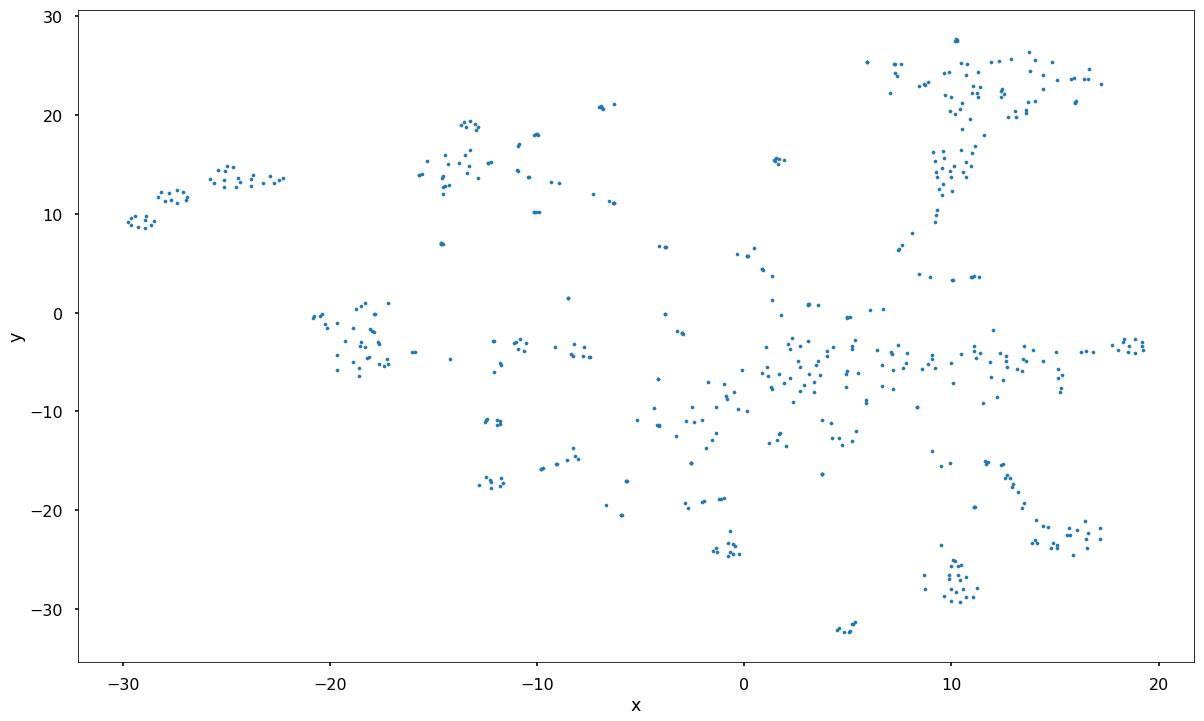

In [15]:
sns.set_context("poster")

#plot
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [16]:
#zoom in into the plot
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

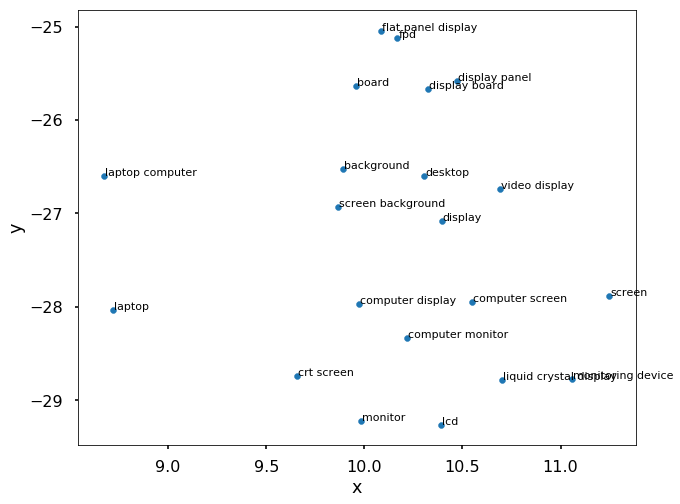

In [18]:
plot_region(x_bounds=(8, 13), y_bounds=(-30, -25))

In [19]:
text2vec.wv.most_similar("chair")

[('rocking chair', 0.9627920389175415),
 ('rocker', 0.9578711986541748),
 ('folding chair', 0.9499403834342957),
 ('beach chair', 0.9468148946762085),
 ('chaise', 0.9443647861480713),
 ('chaise longue', 0.9433206915855408),
 ('tulip chair', 0.9427719712257385),
 ('ball chair', 0.9418196678161621),
 ('deck chair', 0.9398950934410095),
 ('daybed', 0.9372831583023071)]

In [20]:
text2vec.wv.most_similar("table")

[('desk', 0.9749444723129272),
 ('side table', 0.9663544297218323),
 ('drawing table', 0.9653061628341675),
 ('workshop table', 0.9630077481269836),
 ('rectangular table', 0.9629335999488831),
 ('drafting table', 0.9507492184638977),
 ('cabinet table', 0.9485939741134644),
 ('worktable', 0.946897566318512),
 ('work table', 0.9399303793907166),
 ('kitchen table', 0.9369111657142639)]

In [21]:
text2vec.wv.most_similar("lamp")

[('laptop computer', 0.6320562362670898),
 ('floor lamp', 0.6131067276000977),
 ('acoustic guitar', 0.6067026853561401),
 ('wall clock', 0.5885015726089478),
 ('alarm clock', 0.5808491706848145),
 ('alarm', 0.5783077478408813),
 ('grandfather clock', 0.5701669454574585),
 ('longcase clock', 0.568123996257782),
 ('knife', 0.5672478675842285),
 ('table lamp', 0.5584310293197632)]

In [22]:
text2vec.wv.most_similar("car")

[('coupe', 0.9275468587875366),
 ('stock car', 0.9102864265441895),
 ('hatchback', 0.9036633968353271),
 ('hot rod', 0.9035540819168091),
 ('hot-rod', 0.9021649360656738),
 ('racer', 0.8974037170410156),
 ('limousine', 0.8903389573097229),
 ('racing car', 0.8853664994239807),
 ('race car', 0.8848546147346497),
 ('tourer', 0.8788419365882874)]

In [23]:
text2vec.wv.most_similar("phone")

[('handset', 0.9741607308387756),
 ('french telephone', 0.9738401770591736),
 ('desk phone', 0.9679966568946838),
 ('cell', 0.9660876393318176),
 ('cellular telephone', 0.9618216753005981),
 ('earpiece', 0.9573543071746826),
 ('computer keyboard', 0.9530268311500549),
 ('earphone', 0.9502719044685364),
 ('cellular phone', 0.9487477540969849),
 ('keypad', 0.942655622959137)]

In [24]:
text2vec.wv.most_similar("bus")

[('jitney', 0.9996451139450073),
 ('motorcoach', 0.9996317028999329),
 ('double-decker', 0.9996039271354675),
 ('passenger vehi', 0.9995738863945007),
 ('omnibus', 0.9993641376495361),
 ('coach', 0.9992544054985046),
 ('motorbus', 0.9985891580581665),
 ('charabanc', 0.9984617233276367),
 ('autobus', 0.9971399903297424),
 ('can', 0.9757269620895386)]

In [25]:
text2vec.wv.most_similar("bike")

[('dirt bike', 0.9632744193077087),
 ('scrambler', 0.9615655541419983),
 ('moped', 0.9575954675674438),
 ('trail bike', 0.956555187702179),
 ('cycle', 0.9371389746665955),
 ('wheel', 0.9340038299560547),
 ('bicycle', 0.9246512651443481),
 ('motorcycle', 0.8382394313812256),
 ('wide-body aircraft', 0.7615112662315369),
 ('twin-aisle airplane', 0.7564845085144043)]

In [26]:
text2vec.wv.most_similar("boat")

[('small boat', 0.9960728287696838),
 ('pirate ship', 0.9895965456962585),
 ('sea boat', 0.989292562007904),
 ('canoe', 0.9889751076698303),
 ('catamaran', 0.987849771976471),
 ('dory', 0.987693190574646),
 ('clipper', 0.9874402284622192),
 ('guard boat', 0.9870436787605286),
 ('outboard', 0.987012505531311),
 ('outboard motorboat', 0.9867821335792542)]

In [27]:
text2vec.wv.most_similar("plane")

[('transport airplane', 0.9993488192558289),
 ('swept wing', 0.9990774989128113),
 ('jet-propelled plane', 0.9990684390068054),
 ('airliner', 0.9990535378456116),
 ('jet', 0.998982310295105),
 ('airplane', 0.998500645160675),
 ('aeroplane', 0.998235285282135),
 ('jet plane', 0.9979612231254578),
 ('straight wing', 0.9961549043655396),
 ('propeller plane', 0.9958639740943909)]

In [28]:
text2vec.wv.most_similar("rifle")

[('precision rifle', 0.9941026568412781),
 ('sniper rifle', 0.9909502863883972),
 ('shooting iron', 0.9803005456924438),
 ('side arm', 0.9787512421607971),
 ('carbine', 0.9763444662094116),
 ('pistol', 0.9761303663253784),
 ('handgun', 0.9718133807182312),
 ('six-shooter', 0.9691383838653564),
 ('six-gun', 0.9669408202171326),
 ('revolver', 0.9620193839073181)]

In [29]:
#search for the id of object; you have the tag.

input_word = 'chair'

file_names = sorted(glob.glob('data/*.csv'))

image_ids = []

for file_name in file_names:
    df = pd.read_csv(file_name)
    
    count = 0
    for index, row in df.iterrows():
        
        sentence = []
        for i in range (1, len(row)):
            if (type(row[i]) == type('str') and len(row[i]) > 2):
                if (row[i] != '' and row[i] != ' '):
                    if ((row[i][0] >= 'a' and row[i][0] <='z') or (row[i][0] >= 'A' and row[i][0] <='Z')):
                        sentence.append(row[i].lower())
        
            cleaned_sentence = (';'.join(sentence)).split(';')
            sentence = cleaned_sentence
            
            if (input_word in sentence and row[0] not in image_ids):
                image_ids.append(row[0])
                count += 1
                
    print(file_name + ' ---------- ' + str(count))

data/02691156.csv ---------- 0
data/02747177.csv ---------- 0
data/02773838.csv ---------- 0
data/02801938.csv ---------- 0
data/02808440.csv ---------- 0
data/02818832.csv ---------- 0
data/02828884.csv ---------- 15
data/02834778.csv ---------- 0
data/02843684.csv ---------- 0
data/02858304.csv ---------- 0
data/02871439.csv ---------- 0
data/02876657.csv ---------- 0
data/02880940.csv ---------- 0
data/02924116.csv ---------- 0
data/02933112.csv ---------- 0
data/02942699.csv ---------- 0
data/02946921.csv ---------- 0
data/02954340.csv ---------- 0
data/02958343.csv ---------- 0
data/02992529.csv ---------- 0
data/03001627.csv ---------- 5531
data/03046257.csv ---------- 0
data/03085013.csv ---------- 0
data/03207941.csv ---------- 0
data/03211117.csv ---------- 0
data/03261776.csv ---------- 0
data/03320046.csv ---------- 0
data/03325088.csv ---------- 0
data/03337140.csv ---------- 0
data/03467517.csv ---------- 0
data/03513137.csv ---------- 0
data/03593526.csv ---------- 0
data

In [30]:
image_id = image_ids[random.randrange(0, len(image_ids))]
print(image_id)

3dw.d3bf9df2360f0a56731dc97277e95217


In [31]:
#save image_id in a new file

#f = open("image_id.txt","w+")
#f.write(file_name + '/' + image_id)